# Network Flows Day 1 Implementation Activity

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

## Code to Draw Graph (for debugging)


In [11]:
def draw_graph(graph, layout):
    """
    Draws the representation of a networkx graph object.
    Source: https://notebooks.azure.com/coells/projects/100days/html/day%2049%20-%20ford-fulkerson.ipynb
    
    Args:
        graph (networkx graph object): an undirected graph.
        layout (dictionary): a dictionary with graph nodes stored as keys and positions 
            stored as the values. Note that positions are sequences of length 2.
    """

    plt.figure(figsize=(12, 4))
    plt.axis('off')

    nx.draw_networkx_nodes(graph, layout, node_color='steelblue', node_size=600)
    nx.draw_networkx_edges(graph, layout, edge_color='gray')
    nx.draw_networkx_labels(graph, layout, font_color='white')

    for u, v, e in graph.edges(data=True):
        label = '{}/{}'.format(e['flow'], e['capacity'])
        color = 'green' if e['flow'] < e['capacity'] else 'red'
        x = layout[u][0] * .6 + layout[v][0] * .4
        y = layout[u][1] * .6 + layout[v][1] * .4
        t = plt.text(x, y, label, size=16, color=color, 
                     horizontalalignment='center', verticalalignment='center')

    plt.show()

## Max Flow Algorithm - Ford-Fulkerson

### Find a source to sink path

In [12]:
def find_path(graph, source, sink, path, visited):
    """
    A recursive algorithm that finds and returns an augmenting path from source to sink, if one exists.
    
    Args:
        graph (networkx graph object): the graph to find the path for
        source (string): the start of the path, taken from a list of nodes in the graph object
        sink (string): the end of the path, taken from a list of nodes in the graph object
        path (string): the full path of the graph, note that this is a 
            string of edges+residuals traversed
        visited (set): a unique list of nodes already visited
        
    Returns:
        Full path from source to sink (string)
    """

    # residual graph needs edges going in both directions - undirected representation
    residual_graph = graph.to_undirected()

    # if you have reached the sink already, return the path
    if source == sink:
        return path

    # go through edges in residual graph
    for edge in residual_graph.edges(source, data=True):
        edge_sink = edge[1]
        edge_data = edge[2]

        # determine if that edge was in the forward direction in the original graph
        # and compute the residual based on this information
        in_direction = graph.has_edge(source, edge_sink)
        if in_direction:
            residual = edge_data['capacity'] - edge_data['flow']
        else:
            residual = edge_data['flow']

        # check for positive residual value and make sure the node hasn't already been
        # visited as part of this path (no cycles)
        if residual > 0 and not edge_sink in visited:
            visited.add(edge_sink)
            # recursively call this function until we reach the sink
            result = find_path(graph, edge_sink, sink, path + [(edge,residual)], visited)

            if result != None:
                return result

    # if we can't reach the sink from the source, return None      
    return None

### Find max flow

In [13]:
def max_flow(graph, source, sink, layout):
    """
    Finds and returns the maximum flow in the networkx graph object using the 
    Ford-Fulkerson Algorithm.

    Args:
        graph (networkx graph object): a networkx graph object
        source (string): the starting node of the flow
        sink (string): the end of the flow
        layout (dictionary): a dictionary with graph nodes stored as keys and positions 
            stored as the values. Note that positions are sequences of length 2.
    
    Returns: length of maximum flow (int)
    """

    # TODO: Your Code to find the maximum flow should go here.

    draw_graph(graph, layout)
    return 0 # replace this with your own implementation

### Example Problem

{'A': [0, 1], 'B': [1, 1], 'C': [0, 0], 'D': [1, 0]}


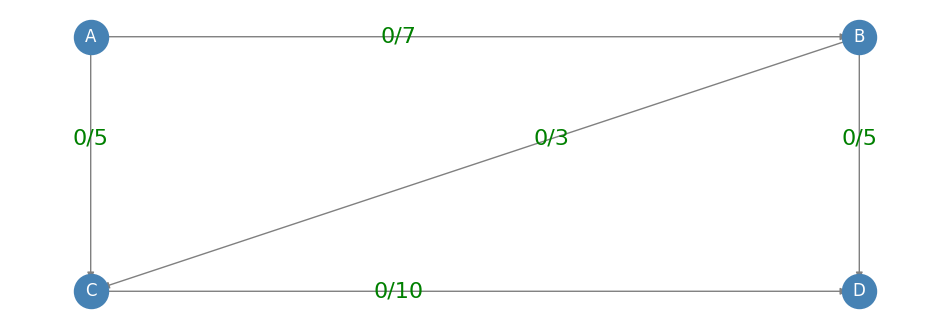

Maximum flow:  0


In [14]:
# create the directed graph object
graph = nx.DiGraph()

# set up the graph to run the max flow algorithm on
graph.add_nodes_from('ABCD')
graph.add_edges_from([
    ('A', 'B', {'capacity': 7, 'flow': 0}),
    ('A', 'C', {'capacity': 5, 'flow': 0}),
    ('B', 'C', {'capacity': 3, 'flow': 0}),
    ('B', 'D', {'capacity': 5, 'flow': 0}),
    ('C', 'D', {'capacity': 10, 'flow': 0}),
])

# set up the layout of where you want each node to be drawn in relation to one
# another (for debug purposes)
layout = {
    'A': [0, 1], 'B': [1, 1], 'C': [0, 0], 'D': [1, 0],
}

# maximum flow for this example problem should be 12
print("Maximum flow: ", max_flow(graph, 'A', 'D', layout))

## Max Flow Algorithm - Edmonds-Karp

### Find a source to sink path

In [15]:
def find_shortest_path(graph, source, sink):
    """
    Finds and returns the shortest augmenting path from source to sink, if one exists.
    
    Args:
        graph (networkx graph object): a networkx graph object
        source (string): the starting node of the flow
        sink (string): the end of the flow
    
    Returns: the shortest path from source to sink (string)
    """

    # TODO: Input your code here.

    return None

### Find max flow

In [16]:
def max_flow_ek(graph, source, sink, layout):
    """
    Finds and returns the maximum flow in the networkx graph object using the 
    Edmonds-Karp Algorithm.

    Args:
        graph (networkx graph object): a networkx graph object
        source (string): the starting node of the flow
        sink (string): the end of the flow
        layout (dictionary): a dictionary with graph nodes stored as keys and positions 
            stored as the values. Note that positions are sequences of length 2.
    
    Returns: length of maximum flow (int)
    """

    # TODO: Your Code to find the maximum flow should go here.

    draw_graph(graph, layout)
    return 0 # replace this with your own implementation!

### Example Problem

{'A': [0, 1], 'B': [1, 1], 'C': [0, 0], 'D': [1, 0]}


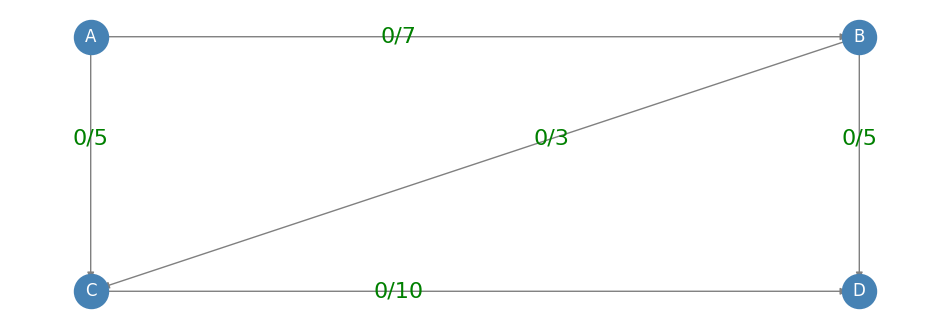

Maximum flow:  0


In [17]:
# create the directed graph object
graph = nx.DiGraph()

# set up the graph to run the max flow algorithm on
graph.add_nodes_from('ABCD')
graph.add_edges_from([
    ('A', 'B', {'capacity': 7, 'flow': 0}),
    ('A', 'C', {'capacity': 5, 'flow': 0}),
    ('B', 'C', {'capacity': 3, 'flow': 0}),
    ('B', 'D', {'capacity': 5, 'flow': 0}),
    ('C', 'D', {'capacity': 10, 'flow': 0}),
])

# set up the layout of where you want each node to be drawn in relation to one
# another (for debug purposes)
layout = {
    'A': [0, 1], 'B': [1, 1], 'C': [0, 0], 'D': [1, 0],
}

# maximum flow for this example problem should be 12
print("Maximum flow: ", max_flow_ek(graph, 'A', 'D', layout))